In [ ]:
import math
import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime

In [ ]:
df1=pd.read_csv("/content/TSLA.csv")
df1

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800000,5.000000,3.508000,4.778000,4.778000,93831500
1,2010-06-30,5.158000,6.084000,4.660000,4.766000,4.766000,85935500
2,2010-07-01,5.000000,5.184000,4.054000,4.392000,4.392000,41094000
3,2010-07-02,4.600000,4.620000,3.742000,3.840000,3.840000,25699000
4,2010-07-06,4.000000,4.000000,3.166000,3.222000,3.222000,34334500
...,...,...,...,...,...,...,...
2951,2022-03-18,874.489990,907.849976,867.390015,905.390015,905.390015,33408500
2952,2022-03-21,914.979980,942.849976,907.090027,921.159973,921.159973,27327200
2953,2022-03-22,930.000000,997.859985,921.750000,993.979980,993.979980,35289500
2954,2022-03-23,979.940002,1040.699951,976.400024,999.109985,999.109985,40225400


In [ ]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2956 entries, 0 to 2955
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2956 non-null   object 
 1   Open       2956 non-null   float64
 2   High       2956 non-null   float64
 3   Low        2956 non-null   float64
 4   Close      2956 non-null   float64
 5   Adj Close  2956 non-null   float64
 6   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 161.8+ KB


#

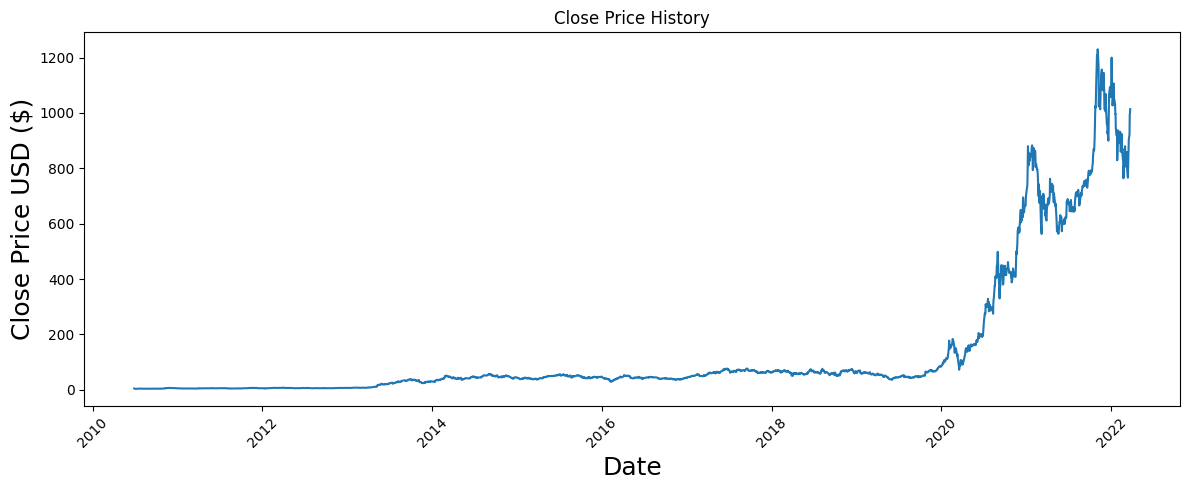

In [ ]:
# Convert 'Date' column to datetime type (if not already)
df1['Date'] = pd.to_datetime(df1['Date'])

# Set 'Date' as the index
df1.set_index('Date', inplace=True)

# Now plot
plt.figure(figsize=(12, 5))
plt.plot(df1['Close'])
plt.title('Close Price History')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.xticks(rotation=45)  # Rotate dates for better visibility
plt.tight_layout()       # Adjust layout to prevent label cutoff
plt.show()


In [ ]:
data=df1.filter(['Close'])
dataset=data.values
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2365

In [ ]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00131893],
       [0.00130915],
       [0.00100428],
       ...,
       [0.80767879],
       [0.81186057],
       [0.82393312]])

In [ ]:
df1.values

array([[3.80000000e+00, 5.00000000e+00, 3.50800000e+00, 4.77800000e+00,
        4.77800000e+00, 9.38315000e+07],
       [5.15800000e+00, 6.08400000e+00, 4.66000000e+00, 4.76600000e+00,
        4.76600000e+00, 8.59355000e+07],
       [5.00000000e+00, 5.18400000e+00, 4.05400000e+00, 4.39200000e+00,
        4.39200000e+00, 4.10940000e+07],
       ...,
       [9.30000000e+02, 9.97859985e+02, 9.21750000e+02, 9.93979980e+02,
        9.93979980e+02, 3.52895000e+07],
       [9.79940002e+02, 1.04069995e+03, 9.76400024e+02, 9.99109985e+02,
        9.99109985e+02, 4.02254000e+07],
       [1.00972998e+03, 1.02448999e+03, 9.88799988e+02, 1.01391998e+03,
        1.01391998e+03, 2.29019000e+07]])

In [ ]:
# create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()

[array([1.31893210e-03, 1.30915016e-03, 1.00427957e-03, 5.54310154e-04,
       5.05400434e-05, 0.00000000e+00, 2.70633781e-04, 2.60851837e-04,
       2.03790498e-04, 3.81495812e-04, 6.58650889e-04, 6.66802509e-04,
       7.89076807e-04, 9.96127953e-04, 7.33645792e-04, 7.20603200e-04,
       8.47768470e-04, 8.95047866e-04, 8.39616851e-04, 7.74403891e-04,
       8.02119399e-04, 7.41797412e-04, 6.74954128e-04, 8.34725879e-04,
       1.00264925e-03, 8.90156894e-04, 7.58100651e-04, 6.17892789e-04,
       6.19523113e-04, 5.26594646e-04, 3.42368036e-04, 2.93458317e-04,
       4.10841643e-04, 4.85836547e-04, 5.46158534e-04, 4.84206223e-04,
       4.87466871e-04, 5.38006914e-04, 7.05930284e-04, 5.54310154e-04,
       6.68432833e-04, 6.43977973e-04, 6.35826353e-04, 6.63541861e-04,
       5.99959225e-04, 7.58100651e-04, 8.57550414e-04, 8.55920090e-04,
       7.72773567e-04, 8.31465231e-04, 8.00489075e-04, 7.12451580e-04,
       8.02119399e-04, 8.67332358e-04, 1.00754022e-03, 8.37986527e-04,
     

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(2305, 60)

In [ ]:

x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

NameError: name 'x_train' is not defined

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

C:\Users\Suraj\.conda\envs\opencv_tutorial\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=5)

Epoch 1/5
2305/2305 ━━━━━━━━━━━━━━━━━━━━ 53s 21ms/step - loss: 4.1161e-05
Epoch 2/5
2305/2305 ━━━━━━━━━━━━━━━━━━━━ 47s 20ms/step - loss: 9.2638e-06
Epoch 3/5
2305/2305 ━━━━━━━━━━━━━━━━━━━━ 46s 20ms/step - loss: 7.8289e-06
Epoch 4/5
2305/2305 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - loss: 6.0092e-06
Epoch 5/5
2305/2305 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - loss: 4.8316e-06


In [ ]:
test_data=scaled_data[training_data_len-60:,:]

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])


In [ ]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [ ]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [ ]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

69.57067531997541

C:\Users\Suraj\AppData\Local\Temp\ipykernel_31344\1898615081.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


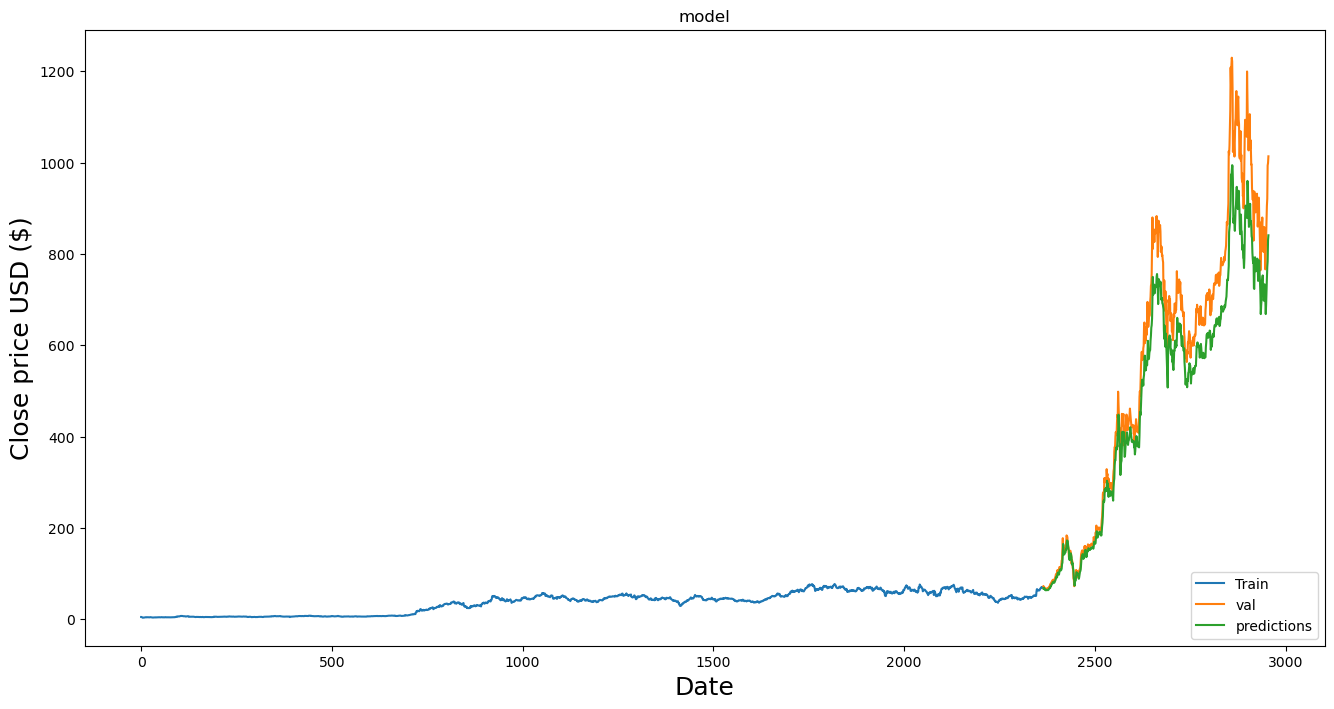

In [ ]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD ($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [ ]:
valid # Actual closing price and predict closing price

,Close,predictions
2365,71.903999,66.900749
2366,70.444000,68.447105
2367,70.966003,67.501740
2368,66.608002,67.829361
2369,67.267998,64.358452
...,...,...
2951,905.390015,745.704590
2952,921.159973,770.883789
2953,993.979980,783.823486
2954,999.109985,830.236267


In [ ]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500
